<a href="https://colab.research.google.com/github/jazaineam1/Diplomado_ucentral_ME/blob/main/Cuadernos/Arima_aplicacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo ARIMA

### Descripción de los datos

La serie de tiempo  es el precio del barril del petróleo WTI. Los datos son numéricos discretos de razón, tienen una periodicidad mensual con un tamaño muestral de 360 observaciones, inicia en enero del año 1993 y finaliza en diciembre del 2022.

Descargue el conjunto de datos de siguiente [enlace](https://github.com/jazaineam1/Diplomado_ucentral_ME/blob/main/Datos/precio_wti.xlsx)

### Cargar los datos

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read Excel file
base_1 = pd.read_excel("precio_wti.xlsx")
base_1.columns = ['fecha', 'precio_wti']


# Creating time series
base_1['fecha'] = pd.date_range(start="1993-01-01", periods=len(base_1), freq='M')

# Display the DataFrame
base_1


,fecha,precio_wti
0,1993-01-31,20.26
1,1993-02-28,20.60
2,1993-03-31,20.44
3,1993-04-30,20.53
4,1993-05-31,20.02
...,...,...
355,2022-08-31,89.55
356,2022-09-30,79.49
357,2022-10-31,86.53
358,2022-11-30,80.56




##  Metodología Box-Jenkins

### Identificación

Es necesario identificar si la ts
 del precio mensual del barril WTI es estacionaria. Lo anterior implica que la media y la varianza son constantes a través del tiempo, además que la covarianza entre dos periodos de tiempo dependa únicamente de la distancia entre estas (Villavicencio, 2014).

Primero vamos a realizar la gráfica de la serie de tiempo estudiada, por medio de los paquetes ggplot2 y scales. El siguiente es el código de la gráfica:

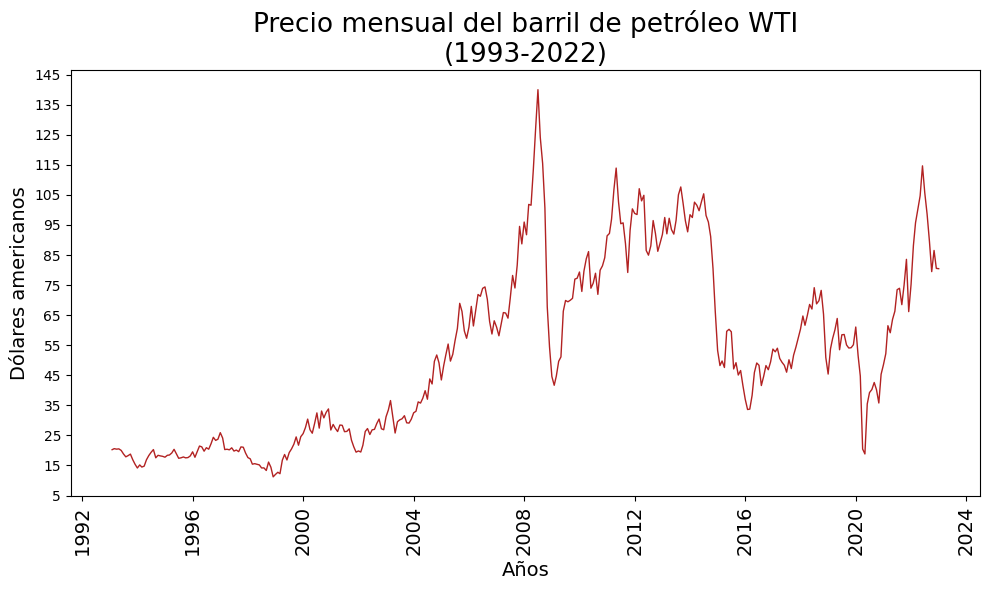

In [23]:

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(base_1['fecha'], base_1['precio_wti'], color="firebrick", linewidth=1)
plt.ylabel("Dólares americanos")
plt.xlabel("")
plt.yscale('linear')
plt.yticks(range(5, 150, 10))
plt.xticks(rotation=90, size=14)
plt.title("Precio mensual del barril de petróleo WTI\n(1993-2022)", size=19, loc="center")
plt.ylabel("Dólares americanos", size=14)
plt.xlabel("Años", size=14)
plt.tight_layout()

# Show the plot
plt.show()








La gráfica de la ts muestra volatilidad en el precio mensual del barril WTI. Aparentemente la ts no tiene presencia de estacionalidad, sin embargo, vamos a comprobar con métodos gráficos y pruebas de hipótesis si esta ts tiene un comportamiento estacional.

#### Descomposición de la ts

La librería ggseas es un complemento de series de tiempo para ggplot2
. La función ggsdc() arroja las gráficas de tendencia, estacionalidad e irregularidad de la ts estudiada.



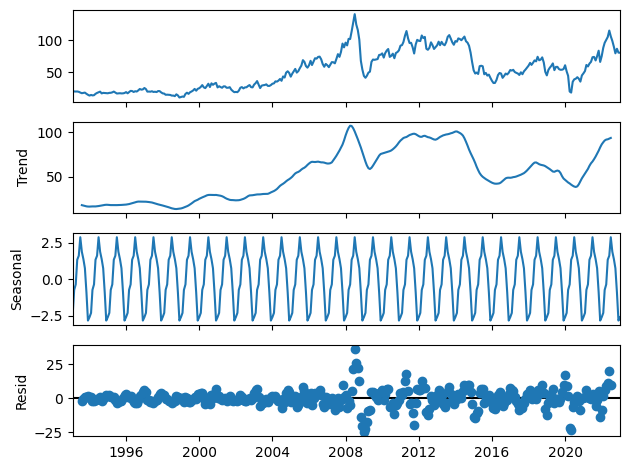

In [25]:
base_1.set_index("fecha", inplace = True)
# Perform seasonal decomposition
seasonal_decompose(base_1).plot();

La ts del WTI no tiene tendencia y en la irregularidad podemos ver la alta volatilidad del precio mensual del barril de petróleo.

#### Prueba Dickey-Fuller aumentada (urca) para la serie original

Es necesario identificar si la ts
 del precio mensual del barril WTI es estacionaria. Una serie estacionaria implica que la media y la varianza son constantes a través del tiempo, además que la covarianza entre dos periodos de tiempo dependa únicamente de la distancia entre estas (Villavicencio, 2014).

El test de Dickey-Fuller aumentado permite examinar si una ts presenta raíz unitaria. La hipótesis nula (H0) de esta prueba es raíz unitaria en la ts.
$$H_0: \text{La serie tiene una raíz unitaria (No Estacionaria)}$$
$$VS$$
$$ H_a:\text{la serie no tiene una raiz unitaria (Estacionaria)} $$
.

In [26]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(base_1)

# Imprimir los resultados de la prueba
print('Resultado de la prueba Dickey-Fuller:')
print(f'Estadística de prueba: {result[0]}')
print(f'Valor p: {result[1]}')
print('Valores críticos:')
for key, value in result[4].items():
    print(f'   {key}: {value}')
print(f'Estimación del número de rezagos utilizados: {result[2]}')

Resultado de la prueba Dickey-Fuller:
Estadística de prueba: -2.2599886747363604
Valor p: 0.18519718502556604
Valores críticos:
   1%: -3.448748905151901
   5%: -2.8696473721448728
   10%: -2.5710891239349585
Estimación del número de rezagos utilizados: 1



Como el p−value de la prueba es mayor que la significancia elegida (0,05), no se rechaza H0.

#### Aplicando la transformación Box-Cox
Para poder estabilizar la ts en varianza vamos a aplicar la transformación boxcox con el método de Guerrero en donde se selecciona el lambda que minimiza el coeficiente de variación para la ts estudiada.

#### Lambda para la ts estudiada
Vamos a guardar el valor del lambda en un objeto para poder usarlo posteriormente.

In [28]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox


# Calculate Box-Cox lambda value
lambda_1, _ = boxcox(base_1['precio_wti'])
valor_lambda=_
base_1['bcx'] = lmbda=lambda_1
print(valor_lambda)
base_1

0.2571784912439962


,precio_wti,bcx
fecha,,
1993-01-31,20.26,4.541210
1993-02-28,20.60,4.577367
1993-03-31,20.44,4.560408
1993-04-30,20.53,4.569959
1993-05-31,20.02,4.515415
...,...,...
2022-08-31,89.55,8.465281
2022-09-30,79.49,8.092423
2022-10-31,86.53,8.356768


In [30]:
(80.47**0.2571784912439962-1)/0.2571784912439962

8.130237544255206

#### Gráfica de la serie transformada con Box-Cox

<Axes: xlabel='fecha'>

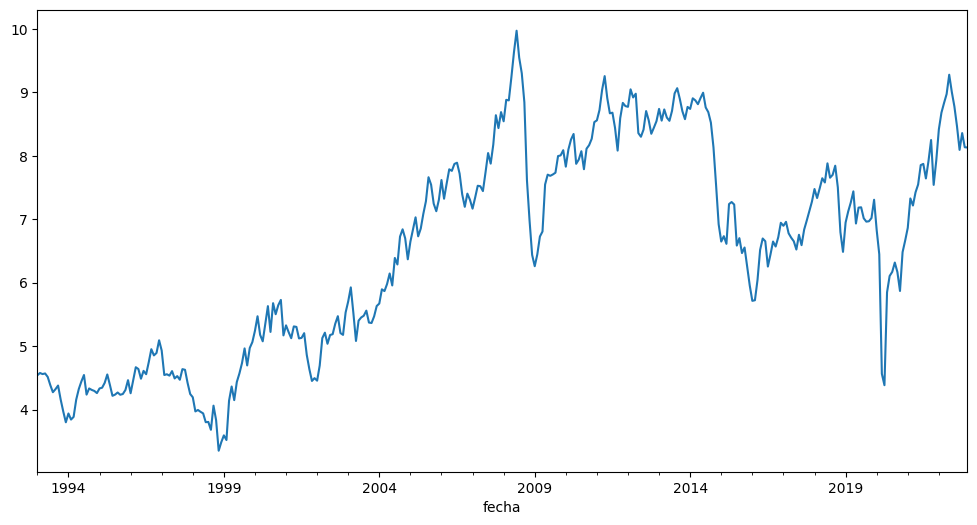

In [34]:
base_1['bcx'].plot(figsize=(12, 6))


Esta nueva ts está ajustada en varianza. A continuación se va a aplicar la prueba Dickey-Fuller aumentada para poder determinar si la transformación Box-Cox es estacionaria.

#### Prueba Dickey-Fuller aumentada (urca) para la transformación Box-Cox

In [35]:
result=adfuller(base_1['bcx'])

# Imprimir los resultados de la prueba
print('Resultado de la prueba Dickey-Fuller:')
print(f'Estadística de prueba: {result[0]}')
print(f'Valor p: {result[1]}')
print('Valores críticos:')
for key, value in result[4].items():
    print(f'   {key}: {value}')
print(f'Estimación del número de rezagos utilizados: {result[2]}')

Resultado de la prueba Dickey-Fuller:
Estadística de prueba: -1.9404841165267759
Valor p: 0.31326219077004425
Valores críticos:
   1%: -3.448748905151901
   5%: -2.8696473721448728
   10%: -2.5710891239349585
Estimación del número de rezagos utilizados: 1


Como el p-valor es mayor que la significancia elegida (0,05) no se puede rechazar H0 . Por lo tanto la ts transformada con Box-Cox presenta raíz unitaria.


#### Aplicando primera diferencia
Para establizar la serie Box-Cox en media es necesario la aplicación de la primera diferencia con la pérdida del primer dato de la ts . Con la función diff() se implementa la primera diferencia a la serie estudiada.



In [9]:
base_1['bcx'].diff().dropna()

fecha
1993-02-28    0.036157
1993-03-31   -0.016959
1993-04-30    0.009552
1993-05-31   -0.054544
1993-06-30   -0.129146
                ...   
2022-08-31   -0.310350
2022-09-30   -0.372858
2022-10-31    0.264344
2022-11-30   -0.223075
2022-12-31   -0.003456
Name: bcx, Length: 359, dtype: float64

<Axes: xlabel='fecha'>

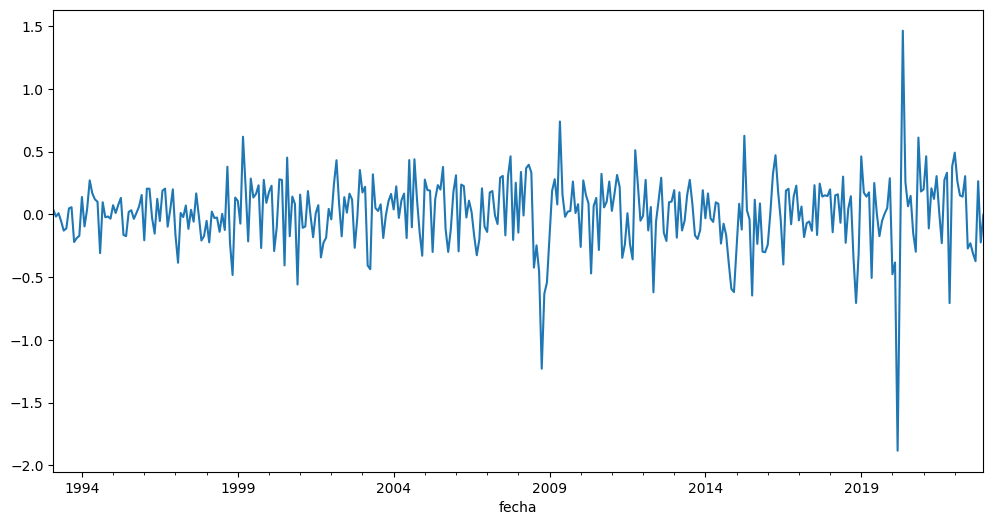

In [37]:
base_1['bcx'].diff().dropna().plot(figsize=(12, 6))


 La tercera gráfica tiene estabilidad alrededor de cero. A continuación se aplica, de nuevo, la prueba Dickey-Fuller aumentado.

#### Prueba Dickey-Fuller aumentada (urca) para la primera diferencia

In [38]:
result=adfuller(base_1['bcx'].diff().dropna())

# Imprimir los resultados de la prueba
print('Resultado de la prueba Dickey-Fuller:')
print(f'Estadística de prueba: {result[0]}')
print(f'Valor p: {result[1]}')
print('Valores críticos:')
for key, value in result[4].items():
    print(f'   {key}: {value}')
print(f'Estimación del número de rezagos utilizados: {result[2]}')

Resultado de la prueba Dickey-Fuller:
Estadística de prueba: -16.222377718281965
Valor p: 3.8859460745178795e-29
Valores críticos:
   1%: -3.448748905151901
   5%: -2.8696473721448728
   10%: -2.5710891239349585
Estimación del número de rezagos utilizados: 0




El p-valor es menor que la significancia elegida (0,05), entonces se rechaza H0
 y se concluye que la serie de la primera diferencia no tiene raíz unitaria, es estacionaria.

# Estimación de los parámetros
Para elegir el modelo ARIMA(p, d, q) más adecuado para el pronóstico es necesario usar los criterios de información de Akaike y Schwarz para elegir el valor de los rezagos p
 y q.


In [44]:
%%capture
!pip install pmdarima

In [13]:
import pmdarima as pm

In [61]:

# Cargar tus datos de series temporales (por ejemplo, en un DataFrame)
# time_series_data = ...

# Convertir tus datos en una serie temporal
time_series = base_1['bcx']

# Ajustar automáticamente un modelo ARIMA utilizando auto_arima()
model = pm.auto_arima(time_series, seasonal=True, stepwise=True, suppress_warnings=True,trace=True)
model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=99.729, Time=2.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=106.309, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=100.168, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=99.054, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=104.770, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=99.822, Time=0.57 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=99.992, Time=0.62 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=97.987, Time=2.86 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=99.872, Time=2.92 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=101.961, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=101.817, Time=0.77 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=101.701, Time=1.91 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=97.319, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=98.385, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=98.205, Time=

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)


### Verificación de los supuestos
Normalidad de los residuos del ARIMA(1,1,2)
Vamos a graficar el histograma de los residuos del modelo. Además, esta gráfica contiene una línea recta para la media y mediana de los residuos.

In [62]:
model.resid()

fecha
1993-01-31    4.541210
1993-02-28    0.036157
1993-03-31   -0.022530
1993-04-30    0.015113
1993-05-31   -0.056405
                ...   
2022-08-31   -0.232352
2022-09-30   -0.287966
2022-10-31    0.339259
2022-11-30   -0.265367
2022-12-31    0.066299
Length: 360, dtype: float64

In [63]:
from scipy.stats import shapiro
statistic, p_value = shapiro(model.resid())

# Print the test results
print("Shapiro-Wilk Test Statistic:", statistic)
print("P-value:", p_value)

Shapiro-Wilk Test Statistic: 0.6827640533447266
P-value: 1.8770152681043262e-25


#### No autocorrelación de los residuos
Graficamos la Función de autocorrelación (ACF) y la Función de autocorrelación parcial (PACF) de los residuos del modelo.

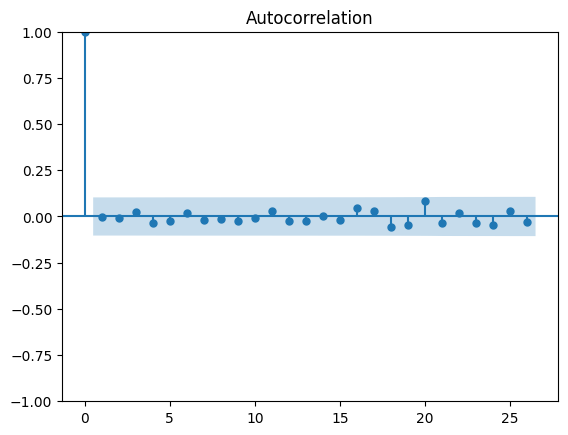

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_acf(model.resid());

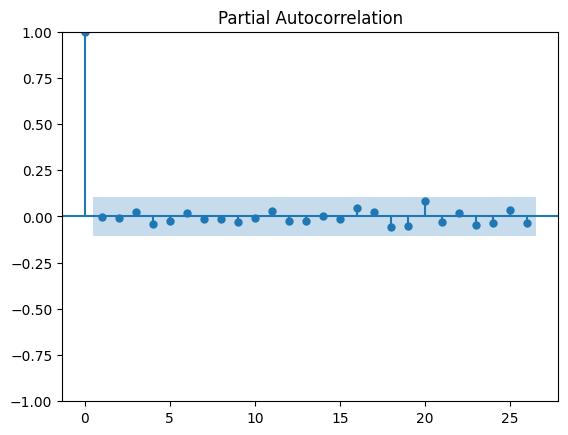

In [18]:
plot_pacf(model.resid());


Como en ambas gráficas las líneas verticales no transpasan los límites horizontales podemos concluir que los residuos del modelo no presentan autocorrelación con una significancia del 5%.



In [48]:
time_series

fecha
1993-01-31    4.541210
1993-02-28    4.577367
1993-03-31    4.560408
1993-04-30    4.569959
1993-05-31    4.515415
                ...   
2022-08-31    8.465281
2022-09-30    8.092423
2022-10-31    8.356768
2022-11-30    8.133693
2022-12-31    8.130238
Name: bcx, Length: 360, dtype: float64

In [49]:
(time_series*valor_lambda+1)**(1/valor_lambda)

fecha
1993-01-31    20.26
1993-02-28    20.60
1993-03-31    20.44
1993-04-30    20.53
1993-05-31    20.02
              ...  
2022-08-31    89.55
2022-09-30    79.49
2022-10-31    86.53
2022-11-30    80.56
2022-12-31    80.47
Name: bcx, Length: 360, dtype: float64

In [58]:
start_date = pd.to_datetime('2020-01-31')
end_date = pd.to_datetime('2025-01-31')

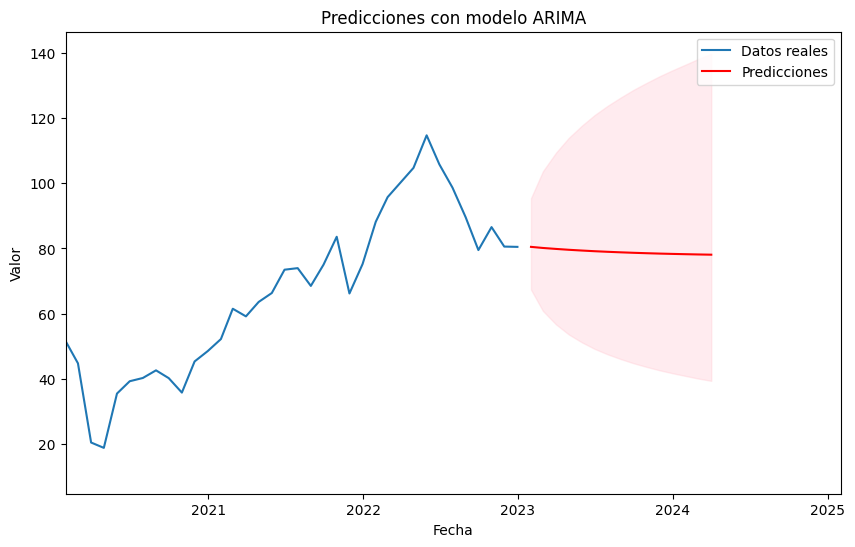

In [59]:

# Realizar predicciones trimestrales a fin de mes
forecast_steps = 15  # Número de pasos de predicción hacia el futuro
last_date = time_series.index[-1]
last_month = last_date.to_period("M")  # Convertir la última fecha a periodo mensual
forecast_dates = pd.period_range(start=last_month + 1, periods=forecast_steps, freq='M').to_timestamp(how="E")  # Fechas trimestrales a fin de mes


forecast, conf_int = model.predict(n_periods=forecast_steps, return_conf_int=True)
forecast=(forecast*valor_lambda+1)**(1/valor_lambda)
conf_int=(conf_int*valor_lambda+1)**(1/valor_lambda)
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot((time_series*valor_lambda+1)**(1/valor_lambda), label='Datos reales')
plt.plot(forecast_dates, forecast, color='red', label='Predicciones')
plt.fill_between(forecast_dates, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Predicciones con modelo ARIMA')
plt.xlim(start_date,end_date)
plt.legend()
plt.show()

In [60]:
forecast

2023-01-31    80.470900
2023-02-28    80.136194
2023-03-31    79.839879
2023-04-30    79.577465
2023-05-31    79.345007
2023-06-30    79.139032
2023-07-31    78.956482
2023-08-31    78.794659
2023-09-30    78.651184
2023-10-31    78.523956
2023-11-30    78.411120
2023-12-31    78.311034
2024-01-31    78.222248
2024-02-29    78.143479
2024-03-31    78.073589
Freq: M, dtype: float64